## Perceptrón multicapa
Entrenar un modelo de red neuronal que aprenda la compuerta XOR
<table>
    <tr>
        <td>P</td><td>Q</td><td>P XOR Q</td>
    </tr>
    <tr>
        <td>1</td><td>1</td><td>0</td>
    </tr>
    <tr>
        <td>1</td><td>0</td><td>1</td>
    </tr>
    <tr>
        <td>0</td><td>1</td><td>1</td>
    </tr>
    <tr>
        <td>0</td><td>0</td><td>0</td>
    </tr>
</table>

### Librerías

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### Cargar los datos de entrenamiento

In [26]:
X = torch.tensor([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]], dtype=torch.float32)

y = torch.tensor([[0],
                  [1],
                  [1],
                  [0]], dtype=torch.float32)

### Definir y configurar el modelo

In [27]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.hidden = nn.Linear(2, 8)  
        self.output = nn.Linear(8, 1)  
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.activation(self.output(x))
        return x

model = XORModel()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

### Entrenar el modelo

In [28]:
losses = []
accuracies = []

for epoch in range(10000):  
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    predicted = outputs.round()
    correct = (predicted == y).sum().item()
    accuracy = correct / y.size(0)

    losses.append(loss.item())
    accuracies.append(accuracy)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch+1}/10000] - Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}")

Epoch [1000/10000] - Loss: 0.6911, Accuracy: 0.75
Epoch [2000/10000] - Loss: 0.6717, Accuracy: 0.75
Epoch [3000/10000] - Loss: 0.5190, Accuracy: 0.75
Epoch [4000/10000] - Loss: 0.2208, Accuracy: 1.00
Epoch [5000/10000] - Loss: 0.0825, Accuracy: 1.00
Epoch [6000/10000] - Loss: 0.0420, Accuracy: 1.00
Epoch [7000/10000] - Loss: 0.0263, Accuracy: 1.00
Epoch [8000/10000] - Loss: 0.0185, Accuracy: 1.00
Epoch [9000/10000] - Loss: 0.0140, Accuracy: 1.00
Epoch [10000/10000] - Loss: 0.0111, Accuracy: 1.00


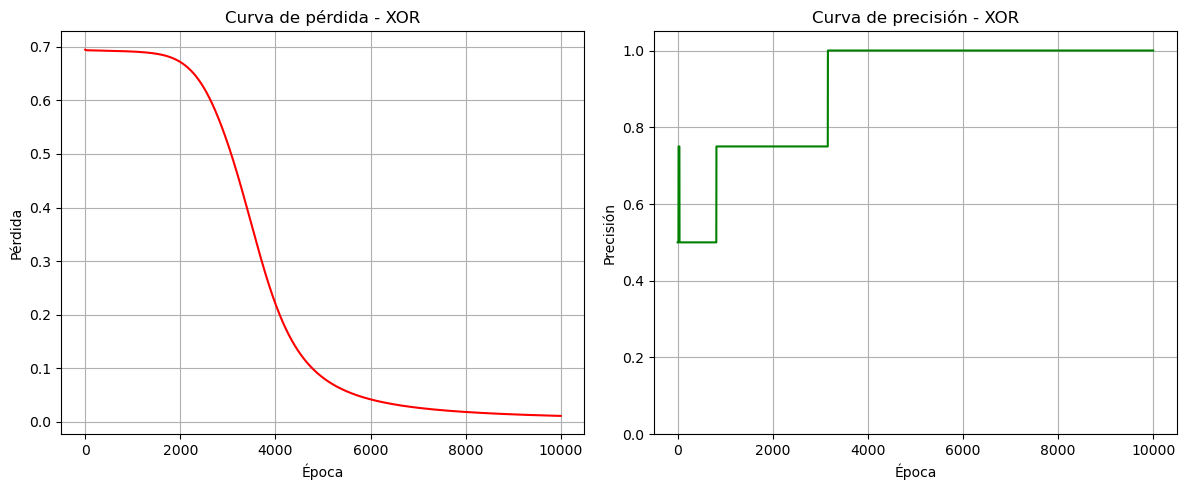


Predicciones finales:
Entrada: [0.0, 0.0] → Predicción: 0
Entrada: [0.0, 1.0] → Predicción: 1
Entrada: [1.0, 0.0] → Predicción: 1
Entrada: [1.0, 1.0] → Predicción: 0


In [31]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, color="red")
plt.title("Curva de pérdida - XOR")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accuracies,color='green')
plt.title("Curva de precisión - XOR")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.ylim(0, 1.05)
plt.grid(True)

plt.tight_layout()
plt.show()

# 🔍 Ver predicciones finales
with torch.no_grad():
    final_outputs = model(X).round()
    print("\nPredicciones finales:")
    for inp, pred in zip(X, final_outputs):
        print(f"Entrada: {inp.tolist()} → Predicción: {int(pred.item())}")